# Hand Gesture Recognition CNN code 

The program follows the Kaggle tutorial : 
https://www.kaggle.com/benenharrington/hand-gesture-recognition-database-with-cnn/comments
This program creates a hand gesture recognition model which can be used for later real time applications.

## Categorizing Images

In [17]:
import numpy as np
import os
import cv2

from keras.models import Sequential
from keras.models import load_model

from modules import sortimage


In [2]:
currentpath = os.getcwd()
currentpath

'D:\\work\\EPSRC\\ParasiteApp\\handgesture'

In [4]:
#Create a dictionary containing the different label which will be used to categorize the images.
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('.\\leapGestRecog\\00\\'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [8]:
#sort the data out in two arrays which will then be split
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('.\\leapGestRecog\\0' + str(i) + '\\'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('.\\leapGestRecog\\0' + 
                                str(i) + '\\' + j + '\\'):
                                # Loop over the images
                img = cv2.imread('.\\leapGestRecog\\0' + 
                                str(i) + '\\' + j + '\\' + k)
                                # Read in and convert to greyscale
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
                img = cv2.resize(img, (320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

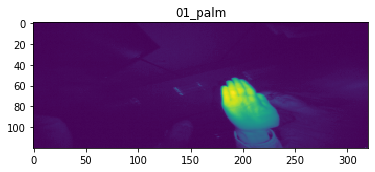

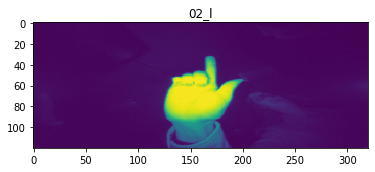

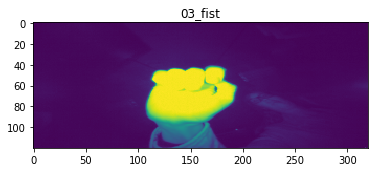

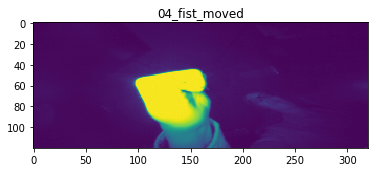

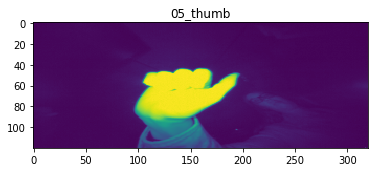

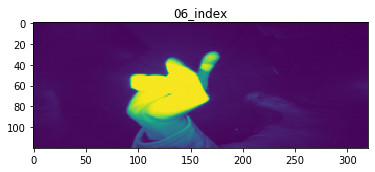

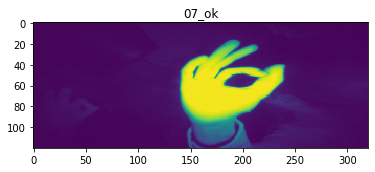

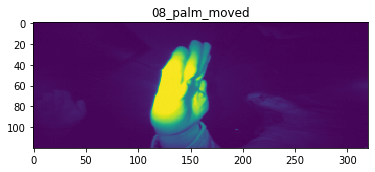

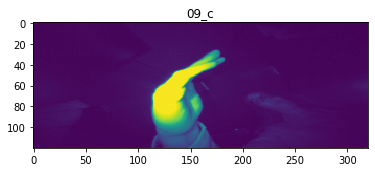

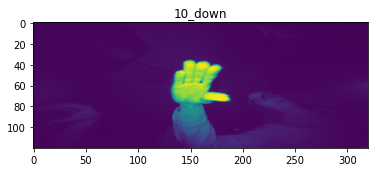

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

## Create, train and evaluate the CNN model

In [11]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

In [12]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [13]:
np.save(".\\data\\x_data", x_data)
np.save(".\\data\\y_data", y_data)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [15]:
from keras import layers
from keras import models

In [16]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

W0625 10:21:55.098858 11608 deprecation_wrapper.py:119] From d:\work\epsrc\parasiteapp\paraenv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 10:21:57.201805 11608 deprecation_wrapper.py:119] From d:\work\epsrc\parasiteapp\paraenv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 10:21:57.658813 11608 deprecation_wrapper.py:119] From d:\work\epsrc\parasiteapp\paraenv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 10:21:58.141539 11608 deprecation_wrapper.py:119] From d:\work\epsrc\parasiteapp\paraenv\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [18]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

W0625 10:23:15.148649 11608 deprecation_wrapper.py:119] From d:\work\epsrc\parasiteapp\paraenv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0625 10:23:15.219160 11608 deprecation_wrapper.py:119] From d:\work\epsrc\parasiteapp\paraenv\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0625 10:23:18.279871 11608 deprecation.py:323] From d:\work\epsrc\parasiteapp\paraenv\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0625 10:23:18.498626 11608 deprecation_wrapper.py:119] From d:\work\epsrc\parasiteapp\paraenv\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add i

Train on 16000 samples, validate on 2000 samples
Epoch 1/10
16000/16000 [==============================] - 269s 17ms/step - loss: 0.3007 - acc: 0.9067 - val_loss: 0.0187 - val_acc: 0.9935
Epoch 2/10
16000/16000 [==============================] - 246s 15ms/step - loss: 0.0131 - acc: 0.9964 - val_loss: 0.0058 - val_acc: 0.9985
Epoch 3/10
16000/16000 [==============================] - 246s 15ms/step - loss: 0.0064 - acc: 0.9984 - val_loss: 0.0057 - val_acc: 0.9975
Epoch 4/10
16000/16000 [==============================] - 244s 15ms/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.0028 - val_acc: 0.9990
Epoch 5/10
16000/16000 [==============================] - 249s 16ms/step - loss: 0.0066 - acc: 0.9990 - val_loss: 0.0125 - val_acc: 0.9980
Epoch 6/10
16000/16000 [==============================] - 259s 16ms/step - loss: 0.0027 - acc: 0.9996 - val_loss: 0.0015 - val_acc: 0.9995
Epoch 7/10
16000/16000 [==============================] - 256s 16ms/step - loss: 0.0023 - acc: 0.9996 - val_loss: 4.7

In [19]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

2000/2000 [==============================] - 15s 7ms/step
Accuracy:1.0


In [20]:
model.save(".\\data\\handgesture_model.h5")